In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
dataset_dir = '../PySpark/ETL_result'
dir_contents = os.listdir(dataset_dir)
dir_contents.sort()
for f in dir_contents:
	print(f) if f.endswith('.csv') else None

part-00000-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00001-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00002-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00003-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00004-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00005-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00006-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv
part-00007-26005234-573b-40dd-bc2c-cfeebc247dce-c000.csv


In [4]:
twitter_col = ['account_id', 'followers_count', 'following_count', \
    'post_count', 'listed_count', 'active_date']
df = pd.DataFrame(columns = twitter_col)

for f in dir_contents:
    if f.endswith('.csv'):
        df1 = pd.read_csv(dataset_dir + '/' + f, names = twitter_col)
        df = pd.concat([df, df1])        

In [5]:
df

,account_id,followers_count,following_count,post_count,listed_count,active_date
0,5.863300e+04,4155.0,4395.0,12823,72,2470.0
1,6.045300e+04,438.0,757.0,515,9,2448.0
2,7.237300e+04,4295.0,4728.0,16282,166,2469.0
3,6.587230e+05,559.0,15.0,5991,25,2443.0
4,7.908860e+05,877.0,415.0,11320,42,2408.0
...,...,...,...,...,...,...
8083,1.716944e+09,4.0,84.0,51,0,22.0
8084,1.716982e+09,0.0,14.0,2,0,16.0
8085,1.717004e+09,7.0,23.0,29,0,27.0
8086,1.717025e+09,2.0,24.0,10,0,15.0


In [6]:
df.isnull().sum()

account_id         50
followers_count     3
following_count     4
post_count          2
listed_count        1
active_date        81
dtype: int64

In [7]:
df.dropna(subset = ['account_id'], inplace=True)
df.isnull().sum()

account_id          0
followers_count     0
following_count     0
post_count          0
listed_count        0
active_date        47
dtype: int64

In [8]:
df['active_date'].fillna(df['active_date'].mean(), inplace=True)
df.isnull().sum()

account_id         0
followers_count    0
following_count    0
post_count         0
listed_count       0
active_date        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   account_id       134978 non-null  float64
 1   followers_count  134978 non-null  float64
 2   following_count  134978 non-null  float64
 3   post_count       134978 non-null  object 
 4   listed_count     134978 non-null  object 
 5   active_date      134978 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


In [10]:
features = df.iloc[:,1:]
print(features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134978 entries, 0 to 8087
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   followers_count  134978 non-null  float64
 1   following_count  134978 non-null  float64
 2   post_count       134978 non-null  object 
 3   listed_count     134978 non-null  object 
 4   active_date      134978 non-null  float64
dtypes: float64(3), object(2)
memory usage: 6.2+ MB
None


In [11]:
features_norm = MinMaxScaler().fit_transform(features)
features_norm = pd.DataFrame(features_norm, columns = list(features.columns))
features_norm

,followers_count,following_count,post_count,listed_count,active_date
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899
...,...,...,...,...,...
134973,0.000003,0.000283,0.000214,0.000000e+00,0.008907
134974,0.000000,0.000047,0.000008,0.000000e+00,0.006478
134975,0.000005,0.000077,0.000122,0.000000e+00,0.010931
134976,0.000001,0.000081,0.000042,0.000000e+00,0.006073


In [12]:
# X_train, X_test = train_test_split(features_norm, test_size=0.2)
# X_train = X_train.iloc[:,1:]
# X_test = X_test.iloc[:,1:]
# print(X_train.shape)
# print(X_test.shape)
# print(X_train.head())

Text(0, 0.5, 'Inertia')

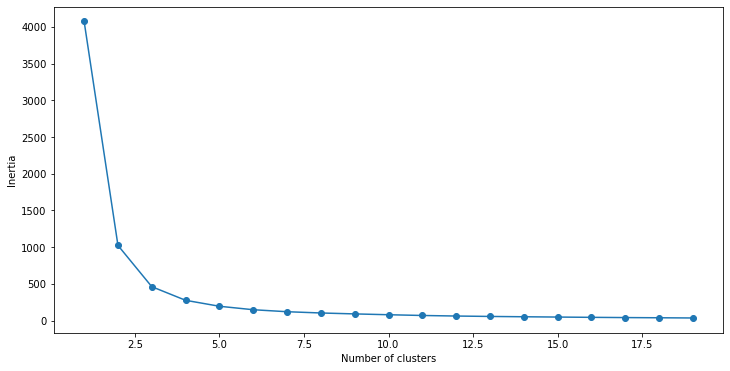

In [13]:
# sum of square distances. insertia
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(features_norm)
    SSE.append(kmeans.inertia_)

# sse elbow plot
sse_df = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(sse_df['Cluster'], sse_df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

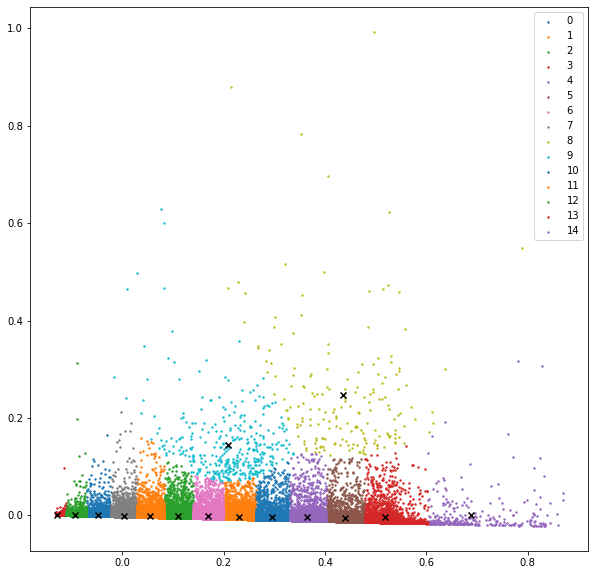

In [14]:
# use PCA to convert dimension to 2
pca = PCA(2)
data = pca.fit_transform(features_norm)

# fitting multiple k-means algorithms
k = 15
model = KMeans(n_clusters = k, init='k-means++')
model.fit(data)
pred = model.predict(data)
uniq = np.unique(pred)

centers = np.array(model.cluster_centers_)

# plot clusters
plt.figure(figsize=(10,10))
for i in uniq:
   plt.scatter(data[pred == i , 0], data[pred == i , 1], s = 2, label = i)
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()

In [15]:
frame = features_norm.copy()
frame['cluster'] = pred
frame['cluster'].value_counts()

3     56079
12    16072
0     11586
7      9578
11     8093
2      7335
6      6520
1      5345
10     4193
14     3765
5      2928
13     2597
9       372
4       328
8       187
Name: cluster, dtype: int64

In [16]:
frame.head()

,followers_count,following_count,post_count,listed_count,active_date,cluster
0,0.002965,0.014794,0.053798,1.849950e-16,1.000000,4
1,0.000313,0.002548,0.002161,2.312437e-17,0.991093,4
2,0.003065,0.015915,0.068310,4.265162e-16,0.999595,4
3,0.000399,0.000050,0.025135,6.423436e-17,0.989069,4
4,0.000626,0.001397,0.047492,1.079137e-16,0.974899,4


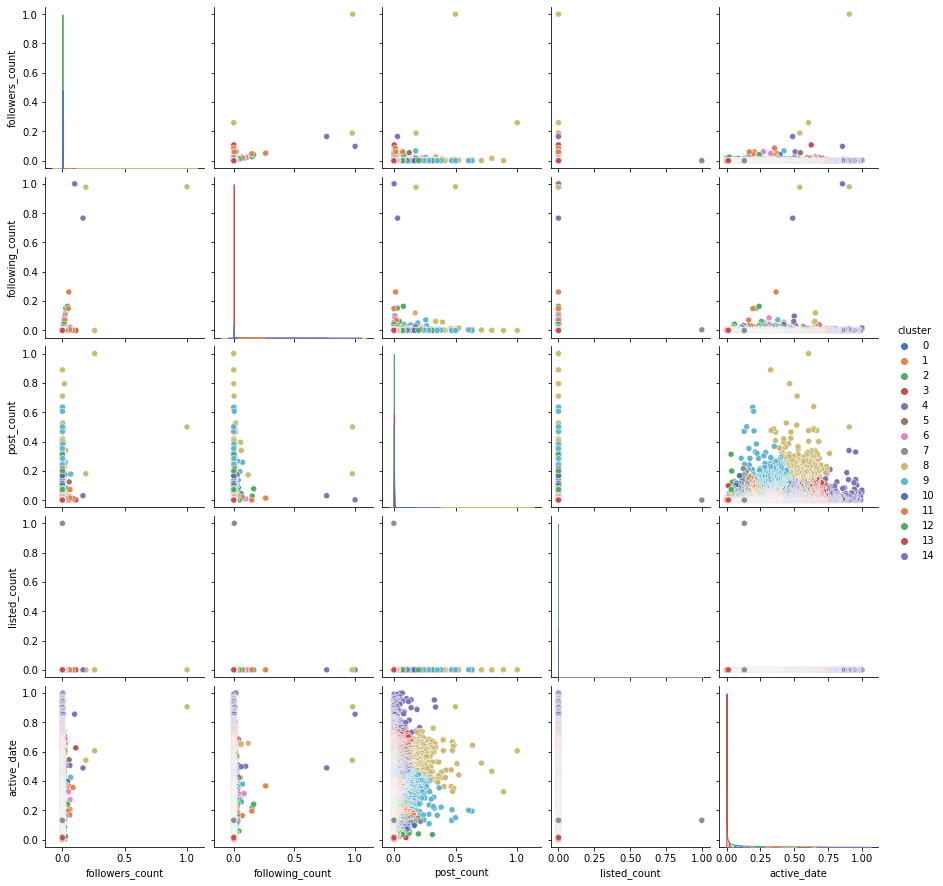

In [17]:
sns.pairplot(frame, hue='cluster', palette='deep')